In [1]:
#project: p9
#submitter-netid: yzhou344
#partner-netid: none

In [2]:
import os,json,csv


In [3]:
def get_file(file_name):
    fl=os.listdir(file_name)
    fl_sorted=sorted(fl,reverse=True)
    return fl_sorted


In [4]:
def get_file_filter(file_name):
    g=[]
    
    for file in get_file(file_name):
        
        if file.endswith(".csv") or file.endswith(".json"):
            g.append(file)
    return g
            
    
   
    

In [5]:
get_file_filter("full_data")

['5.json',
 '5.csv',
 '4.json',
 '4.csv',
 '3.json',
 '3.csv',
 '2.json',
 '2.csv',
 '1.json',
 '1.csv']

In [6]:
#q1
get_file("sample_data")


['2.json', '2.csv', '1.json', '1.csv']

In [7]:
def get_path(file_name):
    total=[]
    for file in get_file(file_name):
            path = os.path.join(file_name, file)
            total.append(path)
            sorted(total,reverse=True)
    return total

In [8]:
#q2
get_path("sample_data")

['sample_data/2.json',
 'sample_data/2.csv',
 'sample_data/1.json',
 'sample_data/1.csv']

In [9]:
#q3
get_path("full_data")

['full_data/meta.info',
 'full_data/agency_info',
 'full_data/5.json',
 'full_data/5.csv',
 'full_data/4.json',
 'full_data/4.csv',
 'full_data/3.json',
 'full_data/3.csv',
 'full_data/2.json',
 'full_data/2.csv',
 'full_data/1.json',
 'full_data/1.csv']

In [10]:
get_file("full_data")

['meta.info',
 'agency_info',
 '5.json',
 '5.csv',
 '4.json',
 '4.csv',
 '3.json',
 '3.csv',
 '2.json',
 '2.csv',
 '1.json',
 '1.csv']

In [11]:
def get_path_filter(file_name):
    
    total=[]
   
    for file in get_file(file_name):
        
        path = os.path.join(file_name, file)
        if file.endswith(".json") or file.endswith(".csv"):
            
            total.append(path)
            
            sorted(total,reverse=True)
    return total

In [12]:
#q4
get_path_filter("sample_data")

['sample_data/2.json',
 'sample_data/2.csv',
 'sample_data/1.json',
 'sample_data/1.csv']

In [13]:
#q5
get_path_filter("full_data")

['full_data/5.json',
 'full_data/5.csv',
 'full_data/4.json',
 'full_data/4.csv',
 'full_data/3.json',
 'full_data/3.csv',
 'full_data/2.json',
 'full_data/2.csv',
 'full_data/1.json',
 'full_data/1.csv']

In [14]:
#creat a new type using namedtuple
from collections import namedtuple
Tweet=namedtuple("Tweet",["tweet_id","username","num_liked","length"])
testing = Tweet("id123", "user456", 100, 140)
testing

Tweet(tweet_id='id123', username='user456', num_liked=100, length=140)

In [15]:
 def process_csv(file):
        # copied from https://automatetheboringstuff.com/chapter14/
        
        exampleFile = open(file, encoding="utf-8")
        exampleReader = csv.reader(exampleFile)
        exampleData = list(exampleReader)
        return exampleData

In [16]:
def tweet_info(file,dic):
    
    path = os.path.join(dic, file)
    
    if file.endswith(".csv"):
        
        m=[]   
        import csv

# use process_csv to pull out the header and data rows
        csv_rows = process_csv(path)
        csv_header = csv_rows[0]
        csv_data = csv_rows[1:]
       
        
        for lists in csv_data:
            if int(len(lists))== int(len(csv_header)):

                k={}
                k[csv_header[0]]=lists[0]
                k[csv_header[1]]=lists[1]
                k[csv_header[2]]=lists[2]
                k[csv_header[3]]=lists[3]
                k[csv_header[4]]=lists[4]
                k[csv_header[5]]=lists[5]
                m.append(k) 

        #print(m)  
        total=[]
        for dic in m:


            from collections import namedtuple
            Tweet=namedtuple("Tweet",["tweet_id","username","num_liked","length"])
            t=Tweet(dic["tweet_id"],dic["username"],int(dic["num_liked"]),len(dic["tweet_text"]))
            total.append(t)
        return total

        
    else:
        if file.endswith(".json"):
            
            f = open(path, encoding="utf-8")
            json_str = f.read()
            f.close()
            
            empty=[]
            
            #for strs in json_str:
            
            try:

                #f = open(path, encoding="utf-8")
                #json_str = f.read()
                #f.close()
                data = json.loads(json_str)
                status=0
                #print("success")

            except:

                status=1
                return empty

                

            if status==0:    
                g=[]

                for id_key in data:
                    if int(len(data[id_key]))== 5:
                        #print(id_key[])



                        from collections import namedtuple
                        Tweet=namedtuple("Tweet",["tweet_id","username","num_liked","length"])

                        t=Tweet(id_key,data[id_key]["username"],data[id_key]["num_liked"],len(data[id_key]["tweet_text"]))
                        if not type(data[id_key]["num_liked"])==int:
                            data[id_key]["num_liked"]=0
                            
                            
                        
                        g.append(t)
                return g


In [17]:
#q6

tweet_info("1.csv","sample_data")

[Tweet(tweet_id='1467811372', username='USERID_6', num_liked=5882, length=29),
 Tweet(tweet_id='1467811592', username='USERID_8', num_liked=2676, length=11),
 Tweet(tweet_id='1467811594', username='USERID_9', num_liked=2182, length=99),
 Tweet(tweet_id='1467811795', username='USERID_1', num_liked=7791, length=36),
 Tweet(tweet_id='1467812025', username='USERID_1', num_liked=8149, length=25)]

In [18]:
#q7 
tweet_info("2.csv","sample_data")

[Tweet(tweet_id='1467812799', username='USERID_7', num_liked=3340, length=103),
 Tweet(tweet_id='1467812964', username='USERID_10', num_liked=3684, length=93),
 Tweet(tweet_id='1467813137', username='USERID_5', num_liked=6816, length=20),
 Tweet(tweet_id='1467813579', username='USERID_1', num_liked=1348, length=64),
 Tweet(tweet_id='1467813782', username='USERID_1', num_liked=4770, length=79)]

In [19]:
#q8
tweet_info("1.csv","full_data")

[Tweet(tweet_id='1467844540', username='USERID_9', num_liked=6366, length=49),
 Tweet(tweet_id='1467844907', username='USERID_3', num_liked=8770, length=42),
 Tweet(tweet_id='1467845095', username='USERID_4', num_liked=8567, length=126),
 Tweet(tweet_id='1467845157', username='USERID_8', num_liked=5761, length=17),
 Tweet(tweet_id='1467852031', username='USERID_2', num_liked=4565, length=63),
 Tweet(tweet_id='1467852067', username='USERID_4', num_liked=9594, length=34),
 Tweet(tweet_id='1467852789', username='USERID_10', num_liked=686, length=44),
 Tweet(tweet_id='1467853135', username='USERID_1', num_liked=6515, length=131),
 Tweet(tweet_id='1467853356', username='USERID_10', num_liked=3192, length=136),
 Tweet(tweet_id='1467853431', username='USERID_10', num_liked=9936, length=30),
 Tweet(tweet_id='1467853479', username='USERID_9', num_liked=4939, length=24),
 Tweet(tweet_id='1467854062', username='USERID_10', num_liked=9346, length=92),
 Tweet(tweet_id='1467854345', username='USERID

In [20]:
#q9
tweet_info("2.csv","full_data")

[Tweet(tweet_id='1467876711', username='USERID_10', num_liked=1117, length=84),
 Tweet(tweet_id='1467877496', username='USERID_1', num_liked=2062, length=106),
 Tweet(tweet_id='1467877833', username='USERID_2', num_liked=4270, length=89),
 Tweet(tweet_id='1467877865', username='USERID_1', num_liked=5899, length=30),
 Tweet(tweet_id='1467878057', username='USERID_6', num_liked=703, length=42),
 Tweet(tweet_id='1467878557', username='USERID_6', num_liked=5814, length=61),
 Tweet(tweet_id='1467878633', username='USERID_2', num_liked=2351, length=33),
 Tweet(tweet_id='1467878971', username='USERID_2', num_liked=2238, length=27),
 Tweet(tweet_id='1467878983', username='USERID_8', num_liked=4860, length=61),
 Tweet(tweet_id='1467879480', username='USERID_4', num_liked=1345, length=97),
 Tweet(tweet_id='1467879984', username='USERID_2', num_liked=3694, length=69),
 Tweet(tweet_id='1467880085', username='USERID_4', num_liked=2478, length=120),
 Tweet(tweet_id='1467880431', username='USERID_3',

In [21]:
#In jason: id is key and the rest is in dic
#q10
tweet_info("1.json","sample_data")

[Tweet(tweet_id='1467810369', username='USERID_4', num_liked=315, length=115),
 Tweet(tweet_id='1467810672', username='USERID_8', num_liked=5298, length=111),
 Tweet(tweet_id='1467810917', username='USERID_8', num_liked=533, length=89),
 Tweet(tweet_id='1467811184', username='USERID_6', num_liked=2650, length=47),
 Tweet(tweet_id='1467811193', username='USERID_8', num_liked=2101, length=111)]

In [22]:
#q11
tweet_info("2.json","sample_data")

[Tweet(tweet_id='1467812416', username='USERID_9', num_liked=5278, length=43),
 Tweet(tweet_id='1467812579', username='USERID_1', num_liked=9700, length=26),
 Tweet(tweet_id='1467812723', username='USERID_3', num_liked=5414, length=94),
 Tweet(tweet_id='1467812771', username='USERID_8', num_liked=2190, length=77),
 Tweet(tweet_id='1467812784', username='USERID_10', num_liked=2667, length=117)]

In [23]:
#test
m=tweet_info("2.json","sample_data")[0]
print(m)
m.tweet_id

Tweet(tweet_id='1467812416', username='USERID_9', num_liked=5278, length=43)


'1467812416'

In [24]:
#q12
tweet_info("5.json","full_data")

[Tweet(tweet_id='1467944581', username='USERID_1', num_liked=7216, length=131),
 Tweet(tweet_id='1467944654', username='USERID_7', num_liked=2838, length=59),
 Tweet(tweet_id='1467944871', username='USERID_1', num_liked=9393, length=51),
 Tweet(tweet_id='1467945476', username='USERID_10', num_liked=9246, length=33),
 Tweet(tweet_id='1467945704', username='USERID_1', num_liked=526, length=62),
 Tweet(tweet_id='1467945787', username='USERID_9', num_liked=8850, length=81),
 Tweet(tweet_id='1467945885', username='USERID_4', num_liked=9403, length=67),
 Tweet(tweet_id='1467946026', username='USERID_1', num_liked=2861, length=69),
 Tweet(tweet_id='1467946137', username='USERID_1', num_liked=5470, length=135),
 Tweet(tweet_id='1467946559', username='USERID_6', num_liked=987, length=116),
 Tweet(tweet_id='1467946592', username='USERID_3', num_liked=9085, length=137),
 Tweet(tweet_id='1467946749', username='USERID_4', num_liked=3381, length=42),
 Tweet(tweet_id='1467946810', username='USERID_4'

In [25]:
#q13
tweet_info("1.json","full_data")

[]

In [26]:
#list every tweet info
#find the right one 
#return path 

def find_id(data_set,info):
    
    
    files=get_file_filter(data_set)
    
    for single_file in files:
        tweet_list=tweet_info(single_file,data_set)
        #print(tweet_list)
           
        for tweet in tweet_list:
            #print(tweet)
            #print(t.tweet_id)
            
            if tweet.tweet_id==info:
                
                
                path = os.path.join(data_set,single_file )
                
                return path
        
    return False
   
    
    


   


In [27]:
#q14
find_id("sample_data","1467813137") 

'sample_data/2.csv'

In [28]:
#q15
find_id("full_data","1467862937") 

False

In [29]:
#q16
find_id("full_data","1467907751") 

'full_data/3.csv'

In [30]:
def find_user(data_set,info):
    files=get_file_filter(data_set)
    path_list=[]
    
    for single_file in files:
        tweet_list=tweet_info(single_file,data_set)
                 
        for tweet in tweet_list:
            #print(tweet)
            #print(t.tweet_id)
            
            if tweet.username==info:
                #print(tweet)
                               
                path = os.path.join(data_set,single_file )
                if path not in path_list:
                
                    path_list.append(path)
                
                result=path_list
            else:
        
                result=False 
    
    return result
    

In [31]:
#q17
find_user("sample_data","USERID_1")

['sample_data/2.json', 'sample_data/2.csv', 'sample_data/1.csv']

In [32]:
def sort_factor_id(s):
    s = s.tweet_id
    return s

def get_tweet(data_set,order,term=None):    
    final=[]
    tuple_pair=[]
    m=[]
   
    files=get_file_filter(data_set)
    #print(files)
    for file in files:
        whole_file_tweet=tweet_info(file,data_set)
        for each in whole_file_tweet:
            if type(each.num_liked)!= int:
                str = each.num_liked
                if "k" in str and not str=="unkown":
                    s1=int(str[0:3]+"000" )    
                if "B" in str and not str=="unkown":
                    s1=int(str[0:3]+"000000000")
                if "M" in str and not str=="unkown":
                    s1=int(str[0:3]+"000000")
                if str == "unkown":
                    s1 = 0
                re = Tweet(each.tweet_id, each.username, s1, each.length)
                final.append(re)
            else:
                final.append(each)
    #print(final)       
    final = sorted(final, key=term,reverse=order)
            
    return final 

In [33]:
#q18
get_tweet("sample_data",False,sort_factor_id)   


[Tweet(tweet_id='1467810369', username='USERID_4', num_liked=315, length=115),
 Tweet(tweet_id='1467810672', username='USERID_8', num_liked=5298, length=111),
 Tweet(tweet_id='1467810917', username='USERID_8', num_liked=533, length=89),
 Tweet(tweet_id='1467811184', username='USERID_6', num_liked=2650, length=47),
 Tweet(tweet_id='1467811193', username='USERID_8', num_liked=2101, length=111),
 Tweet(tweet_id='1467811372', username='USERID_6', num_liked=5882, length=29),
 Tweet(tweet_id='1467811592', username='USERID_8', num_liked=2676, length=11),
 Tweet(tweet_id='1467811594', username='USERID_9', num_liked=2182, length=99),
 Tweet(tweet_id='1467811795', username='USERID_1', num_liked=7791, length=36),
 Tweet(tweet_id='1467812025', username='USERID_1', num_liked=8149, length=25),
 Tweet(tweet_id='1467812416', username='USERID_9', num_liked=5278, length=43),
 Tweet(tweet_id='1467812579', username='USERID_1', num_liked=9700, length=26),
 Tweet(tweet_id='1467812723', username='USERID_3', 

In [34]:
def sort_factor_num_liked(s):
    if not type(s.num_liked)==int:
        s1 = 0
        str = s.num_liked
        if "k" in str and not str=="unkown":
            s1=str[0:3]+"000"     
        if "B" in str and not str=="unkown":
            s1=int(str[0:3]+"000000000")
        if "M" in str and not str=="unkown":
            s1=int(str[0:3]+"000000")
        #print(s1)
        return int(s1)
    else:
        s=s.num_liked
        #print(s)
        return s


In [35]:
#q19
get_tweet("sample_data",True, sort_factor_num_liked)  

[Tweet(tweet_id='1467812579', username='USERID_1', num_liked=9700, length=26),
 Tweet(tweet_id='1467812025', username='USERID_1', num_liked=8149, length=25),
 Tweet(tweet_id='1467811795', username='USERID_1', num_liked=7791, length=36),
 Tweet(tweet_id='1467813137', username='USERID_5', num_liked=6816, length=20),
 Tweet(tweet_id='1467811372', username='USERID_6', num_liked=5882, length=29),
 Tweet(tweet_id='1467812723', username='USERID_3', num_liked=5414, length=94),
 Tweet(tweet_id='1467810672', username='USERID_8', num_liked=5298, length=111),
 Tweet(tweet_id='1467812416', username='USERID_9', num_liked=5278, length=43),
 Tweet(tweet_id='1467813782', username='USERID_1', num_liked=4770, length=79),
 Tweet(tweet_id='1467812964', username='USERID_10', num_liked=3684, length=93),
 Tweet(tweet_id='1467812799', username='USERID_7', num_liked=3340, length=103),
 Tweet(tweet_id='1467811592', username='USERID_8', num_liked=2676, length=11),
 Tweet(tweet_id='1467812784', username='USERID_10

In [36]:
#q20
get_tweet("full_data",True,sort_factor_num_liked)[0:20]

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467894600', username='USERID_8', num_liked=915000, length=67),
 Tweet(tweet_id='1467853431', username='USERID_10', num_liked=9936, length=30),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467860904', username='USERID_7', num_liked=9851, length=30),
 Tweet(tweet_id='1467928014', username='USERID_7', num_liked=9830, length=18),
 Tweet(tweet_id='1467895048', username='USERID_10', num_liked=9822, length=136),
 Tweet(tweet_id='1467966646', username='USERID_7', num_liked=9821, length=47),
 Tweet(tweet_id='1467855673', username='USERID_9', num_liked=9728, length=72),
 Tweet(tweet_id='1467898078', username='USERID_10', num_liked=9705, length=104),
 Tweet(tweet_id='1467928300', username='USERID_9', num_liked=9681, length=79),
 Tweet(tweet_id='1467917177', username='USERID_3', num_liked=9678, length=105),
 Tweet(tweet_id='1467923235', username

In [37]:
#Start of Stage 2 
##########
##########
##########

In [38]:
%matplotlib inline

In [39]:
import pandas as pd

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [40]:
def all_file_tweet(data_1):
    data_1=get_tweet(data_1,True,sort_factor_id)
    l=[]
    for each in data_1:
        if each not in l:
            l.append(each)
    return l   

def count_tweet(data_1):
    return len(all_file_tweet(data_1))
    
    return l

In [41]:
#q21
count_tweet("full_data")


445

In [42]:
#q22

m=[]
a=all_file_tweet("full_data")
#print(a)
for each in a:
    #print(each.username)
    m.append(each.username)
s=set(m)
s

{'USERID_1',
 'USERID_10',
 'USERID_2',
 'USERID_3',
 'USERID_4',
 'USERID_5',
 'USERID_6',
 'USERID_7',
 'USERID_8',
 'USERID_9'}

In [43]:
#key=username value=num of tweet
#q23

num_tweet={}
a=all_file_tweet("full_data")
for tweet in a:
    if tweet.username not in num_tweet:
        
        num_tweet[tweet.username]=1
    else:
        num_tweet[tweet.username]+=1
num_tweet

{'USERID_2': 47,
 'USERID_8': 31,
 'USERID_6': 51,
 'USERID_7': 55,
 'USERID_1': 52,
 'USERID_5': 46,
 'USERID_4': 35,
 'USERID_9': 44,
 'USERID_10': 45,
 'USERID_3': 39}

In [44]:
#q24
#key=username, value=numliked/count
m={}

data_1=get_tweet("full_data", True, sort_factor_id)
a=[]
for each in data_1:
    if each not in a:
        a.append(each)

for tweet in a:
    like=tweet.num_liked
    if not type(like)==int:
        if "k" in like and not like=="unkown":
            
            like=like[0:3]+"000"     
            
        if "B" in like and not like=="unkown":
            like=int(like[0:3]+"000000000")
        if "M" in like and not like=="unkown":
            like=int(like[0:3]+"000000")
                
    #print(type(like))
    if tweet.username not in m:
        if like=="unkown": 
            m[tweet.username]=[0,count,sort_factor_num_liked]
        else:
            count=1
            m[tweet.username]=[int(like),count,sort_factor_num_liked]
    else:
        if like=="unkown": 
            count+=1
            m[tweet.username][0]+=0
            m[tweet.username][1]+=1
        else:
            like=int(like)
            count+=1
            m[tweet.username][0]+=like
            m[tweet.username][1]+=1

num_likes={}
for user in m:
    num_likes[user] = m[user][0]/m[user][1]

num_likes

{'USERID_2': 18494258.80851064,
 'USERID_8': 34463.45161290323,
 'USERID_6': 4559.588235294118,
 'USERID_7': 5079.436363636363,
 'USERID_1': 4369.115384615385,
 'USERID_5': 4583.130434782609,
 'USERID_4': 4578.8,
 'USERID_9': 5334.386363636364,
 'USERID_10': 5728.777777777777,
 'USERID_3': 5023.820512820513}

In [45]:
#q25
m={}
avg_length={}

for tweet in a:
    length=tweet.length
    if not type(length)==int: length = 0 

    if tweet.username not in m:
        count=1
        m[tweet.username]=[length, count]
    else:
        count+=1
        m[tweet.username][0]+=length
        m[tweet.username][1]+=1
        
for each in m:
    avg_length[each] = m[each][0]/m[each][1]
avg_length

{'USERID_2': 79.51063829787235,
 'USERID_8': 73.96774193548387,
 'USERID_6': 73.68627450980392,
 'USERID_7': 72.96363636363637,
 'USERID_1': 81.86538461538461,
 'USERID_5': 73.69565217391305,
 'USERID_4': 73.91428571428571,
 'USERID_9': 78.36363636363636,
 'USERID_10': 72.71111111111111,
 'USERID_3': 67.15384615384616}

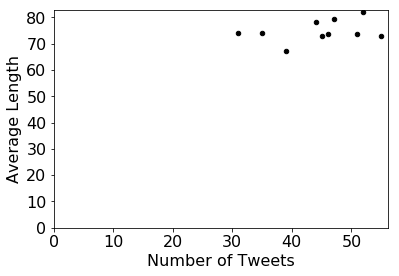

In [46]:
#q26
x=[]
y=[]
for tweet in num_tweet:
    x.append(float(num_tweet[tweet]))
for tweet in avg_length:
    y.append(avg_length[tweet])


scatter(x, y, xlabel="Number of Tweets", ylabel="Average Length")

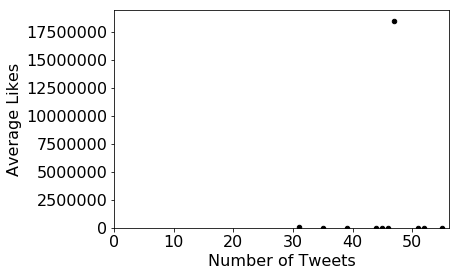

In [47]:
#q27
x=[]
y=[]
for tweet in num_tweet:
    x.append(float(num_tweet[tweet]))
for tweet in num_likes:
    y.append(num_likes[tweet])

scatter(x, y, xlabel="Number of Tweets", ylabel="Average Likes")

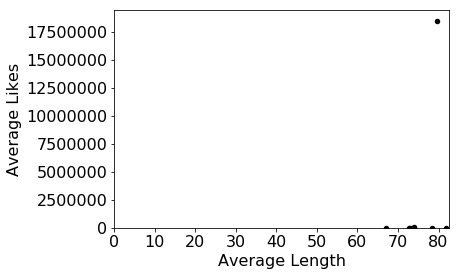

In [48]:
#q28
x=[]
y=[]

for tweet in avg_length:
    x.append(float(avg_length[tweet]))
for tweet in num_likes:
    y.append(num_likes[tweet])

scatter(x, y, xlabel="Average Length", ylabel="Average Likes")

In [49]:
#q29
def outlier():
    likes = []
    num = []
    length = []
    check1 = ""
    check2 = ""

    for tweet in avg_length:
        length.append((tweet, float(avg_length[tweet])))
    for tweet in num_likes:
        likes.append((tweet, num_likes[tweet]))
    for tweet in num_tweet:
        num.append((tweet, num_tweet[tweet]))

    sum1 = 0
    sum2 = 0

    for i in range(len(length)):
        sum1+=(likes[i][1]/num[i][1])
        sum2+=(likes[i][1]/length[i][1])

    mean1 = sum1/len(length)
    mean2 = sum2/len(length)

    for i in range(len(length)):
        if(likes[i][1]/length[i][1])>= mean1:
            if likes[i][0] == length[i][0]:
                check1 = length[i][0]

        if(likes[i][1]/num[i][1])>= mean2:
            if likes[i][0] == num[i][0]:
                check2 = num[i][0]


    if check1 == check2:
        return check1
outlier = outlier()
outlier

'USERID_2'

In [50]:
#q30
outlier_tweet = []
for tweet in a:
    if(tweet.username == outlier):
        outlier_tweet.append(tweet)

outlier_tweet = sorted(outlier_tweet, reverse = True, key = sort_factor_num_liked)
outlier_tweet

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USE

In [51]:
#q31
total_like = num_likes[outlier]*num_tweet[outlier]
most_liked = outlier_tweet[0].num_liked
most_liked/total_like*100

99.97352093731529

In [52]:
#q32
exclude = outlier_tweet[1:]
sum_like = 0
for each in exclude:
    sum_like += each.num_liked
sum_like/len(exclude)

5003.565217391304

In [53]:
#q33
import os
path_list = []

def explore(path):
    if os.path.isfile(path) == True:
        path_list.append(path)
        #path_list.insert(0, path)
    else:
        l = os.listdir(path)
        for each in l:
            if(each.startswith(".")==False):
                explore(os.path.join(path, each))  

        path_list.sort(reverse = True)


explore(os.path.join("play", "rb", "rb9"))
#sorted(path_list, key=str.lower, reverse = True)
path_list

['play/rb/rb9/89.csv', 'play/rb/rb9/12.xls']

In [54]:
#q34
path_list=[]
explore(os.path.join("play","ls"))
#sorted(path_list, key=str.lower, reverse = True)
path_list

['play/ls/qwe/usun.pdf',
 'play/ls/qwe/iuqwe.json',
 'play/ls/mf.py',
 'play/ls/lu.txt']

In [55]:
#q35
path_list=[]

explore(os.path.join("play","ou"))
#sorted(path_list, key=str.lower, reverse = True)
path_list

['play/ou/v',
 'play/ou/quap/uikwe',
 'play/ou/quap/qonxu.txt',
 'play/ou/quap/aoq/qsonj',
 'play/ou/quap/aoq/aqnsa',
 'play/ou/b',
 'play/ou/a']

In [56]:
#q36
path_list=[]
explore(os.path.join("play"))
#sorted(path_list, key=str.lower, reverse = True)
path_list

['play/rb/rb9/89.csv',
 'play/rb/rb9/12.xls',
 'play/rb/ppt.ppt',
 'play/ou/v',
 'play/ou/quap/uikwe',
 'play/ou/quap/qonxu.txt',
 'play/ou/quap/aoq/qsonj',
 'play/ou/quap/aoq/aqnsa',
 'play/ou/b',
 'play/ou/a',
 'play/ls/qwe/usun.pdf',
 'play/ls/qwe/iuqwe.json',
 'play/ls/mf.py',
 'play/ls/lu.txt']

In [57]:
#q37
path_list=[]
explore(os.path.join("recursive", "others"))
#sorted(path_list, key=str.lower, reverse = True)
path_list

['recursive/others/USERID_9.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_6.json',
 'recursive/others/USERID_5.json',
 'recursive/others/USERID_10.json']

In [58]:
#q38
path_list=[]
explore(os.path.join("recursive"))
path_list

['recursive/others/USERID_9.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_6.json',
 'recursive/others/USERID_5.json',
 'recursive/others/USERID_10.json',
 'recursive/USERID_4/true/tweets.json',
 'recursive/USERID_4/false/tweets.json',
 'recursive/USERID_3/tweets.json',
 'recursive/USERID_2/tweets.json',
 'recursive/USERID_1/tweets.json']

In [59]:
#q39

path_list=[]
tweet_file = []
explore(os.path.join("recursive", "USERID_4"))
count = 0
for each in sorted(path_list, key=str.lower, reverse = True):
    if each.endswith(".json")==True:
        tweet_file.append(each)

for path in tweet_file:
    split = path.rfind("/")
    path1 = path[0:split]
    file = path[split+1:]
    count+=len(tweet_info(file,path1))
count

17

In [60]:
#q40
path_list=[]
tweet_file = []
explore(os.path.join("recursive"))
count = 0

for each in path_list:
    if each.endswith(".json")==True:
        tweet_file.append(each)

for path in tweet_file:
    split = path.rfind("/")
    path1 = path[0:split]
    file = path[split+1:]
    count+=len(tweet_info(file,path1))
count

200